<a href="https://colab.research.google.com/github/ankit-rathi/Tradevesting/blob/main/Sector_Indices_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import datetime
import pytz
tz_NY = pytz.timezone('Asia/Kolkata')
datetime_NY = datetime.datetime.now(tz_NY)
print("Run date time (IST):", datetime_NY.strftime("%Y-%m-%d %H:%M:%S"))

gen_output = 0

Run date time (IST): 2024-05-10 20:10:42


In [2]:
# install libraries
!pip install yfinance
!pip install pandas-ta
#!pip install talib-binary

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=191a4fe8debf562f998b743a7fd9f767ca0757afa5cc5eed24b64679307380bb
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas-ta


In [3]:
# import libraries

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')
import pandas_datareader.data as web
import yfinance as yfin
#import talib
yfin.pdr_override()
import pandas_ta as ta

from google.colab import data_table

In [4]:
# set start and end date
start_date = (datetime.date.today() + datetime.timedelta(days=-10*365)).strftime('%Y-%m-%d')
start1_date = (datetime.date.today() + datetime.timedelta(days=-1*365)).strftime('%Y-%m-%d')
end_date = (datetime.date.today() + datetime.timedelta(days=1)).strftime('%Y-%m-%d')

In [5]:
# fetch nse indices scrips

import pandas as pd
import numpy as np

df_nse_sectors = pd.read_csv('https://raw.githubusercontent.com/ankit-rathi/Tradevesting/main/data/NSE_Sectors_Indices.csv')

In [6]:
sectors = df_nse_sectors['Sector'].unique()
df_sectors = pd.DataFrame()
for sector in sectors:
  stocks = df_nse_sectors[df_nse_sectors['Sector'] == sector]['Symbol'].values
  df_sector = pd.DataFrame()
  tweight = 0
  for stock in stocks:
    stock_df = yfin.Ticker(stock+'.NS').history(period='10y', interval='1d')[map(str.title, ['open', 'close', 'low', 'high', 'volume'])]
    col = ['Close']
    stock_df = stock_df[col]
    stock_df['Split'] = 1
    weight = df_nse_sectors[df_nse_sectors['Symbol'] == stock]['Weight'].values[0]
    tweight = sum(df_nse_sectors[df_nse_sectors['Sector'] == sector]['Weight'].values)
    if stock == 'NESTLEIND':
      stock_df.loc[stock_df.index < '2024-01-01', 'Split'] = 10
    #stock_df[stock] = (stock_df[col]*weight)/(tweight*stock_df['Split'].values[0])
    stock_df[stock] = stock_df['Close']/stock_df['Split']
    col = [stock]
    stock_df = stock_df[col]
    df_sector = pd.concat([df_sector, stock_df], axis=1)

  df_sector[sector] = df_sector[stocks].sum(axis=1)
  col = [sector]
  df_sector = df_sector[col]
  df_sectors = pd.concat([df_sectors, df_sector], axis=1)
df_sectors

,AUTO,BANKS,FINANCE,IT,FMCG,PHARMA,MEDIA,METAL,INFRA,CHEMICAL,CEMENT,DURABLES,JEWELLERY,TEXTILES
Date,,,,,,,,,,,,,,
2014-05-12 00:00:00+05:30,6199.269371,1538.233582,359.008739,1995.096039,1211.764009,5567.389832,591.502308,636.900351,5055.688606,1220.096493,9238.318314,656.639015,528.876816,420.971372
2014-05-13 00:00:00+05:30,6342.960182,1545.381363,361.204510,2044.014206,1230.762091,5486.323456,604.546625,646.903913,5172.146021,1223.472958,9426.265747,665.204674,543.080185,413.829983
2014-05-14 00:00:00+05:30,6370.874817,1538.416580,357.165306,2042.185867,1240.417288,5403.431671,602.322668,669.363552,5178.441650,1229.983578,9391.647720,679.309486,552.251465,413.697095
2014-05-15 00:00:00+05:30,6348.568207,1552.161301,349.283688,2029.316818,1244.210458,5345.418396,593.840431,661.852821,5161.426577,1209.395924,9401.050903,673.754555,567.156540,408.658930
2014-05-16 00:00:00+05:30,6344.808311,1619.104660,361.317387,1992.601608,1223.214383,5251.959686,611.713612,688.331059,5325.921179,1233.784817,9651.779556,685.028198,561.993431,408.403744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-06 00:00:00+05:30,31299.599670,6224.187805,9951.500031,13112.600311,12815.250000,18769.050171,2875.050056,5908.199921,26267.650635,23053.200607,40205.300354,21292.550354,4376.249878,5915.600044
2024-05-07 00:00:00+05:30,30678.350159,6191.260010,9922.349808,13206.599701,13044.449982,18425.849976,2834.149986,5797.799927,25901.550385,22224.250259,39874.650696,21025.250061,4347.499908,5928.900005
2024-05-08 00:00:00+05:30,31098.000000,6173.476501,9884.850250,13181.899841,13167.800049,18230.000244,2864.649967,5873.200058,25788.200562,21483.050018,39986.949646,21060.800415,4341.450104,5918.349907


In [7]:
def stock_prec_dev(stock_symbol):
    #stock_symbol = 'ULTRACEMCO.NS'
    short_window = 20
    mid_window = 50
    long_window = 200
    moving_avg = 'SMA'

    # import the closing price data of the stock for the aforementioned period of time in Pandas dataframe
    start = datetime.datetime(*map(int, start_date.split('-')))
    end = datetime.datetime(*map(int, end_date.split('-')))

    stock_df = df_sectors[[stock_symbol]]
    stock_df.columns = ['Close']

    stock_df = stock_df[(stock_df.index <= end_date) & (stock_df.index >= start_date)]
    stock_df['200_SMA'] = round(stock_df['Close'].rolling(window = 200, min_periods = 1).mean(),0)
    stock_df['Dev%_200'] = round((stock_df['Close'] - stock_df['200_SMA'])*100/stock_df['200_SMA'],2)
    stock_df.dropna(axis = 0, inplace = True) # remove any null rows

    stock_df['Sector'] = stock_symbol

    stock_df['Close'] = round(stock_df['Close'],2)
    stock_df['Max'] = round(max(stock_df['Close']),2)
    stock_df = stock_df[(stock_df.index <= end_date) & (stock_df.index >= start1_date)]
    stock_df['Min'] = round(min(stock_df['Close']),2)
    #stock_df['Gained%'] = round((stock_df['Close'] - stock_df['Min'])*100/stock_df['Min'],2)
    stock_df.ta.rsi(append=True)
    #stock_df.rename(columns={'RSI_14':'RSI'}, inplace=True)
    #stock_df['Close'] = round(stock_df['Close'],0)
    stock_df['RSI_14'] = round(stock_df['RSI_14'],0)
    stock_df['ATH%'] = round((stock_df['Max'] - stock_df['Close'])*100/stock_df['Close'],2)
    #stock_df['Sector'] = stock_symbol
    stock_df = stock_df.tail(1)
    return stock_df

In [8]:
df_final =  pd.DataFrame()
for sector in sectors:

  df_tmp = stock_prec_dev(sector)
  df_final = pd.concat([df_final, df_tmp], ignore_index = True) #df_final.append(df_tmp)
# all sectors
df_final = df_final.sort_values(by = 'ATH%', ascending=False)
#data_table.DataTable(df_final, include_index=False)
df_final

,Close,200_SMA,Dev%_200,Sector,Max,Min,RSI_14,ATH%
6,2826.55,3260.0,-13.30,MEDIA,3802.31,1269.75,40.0,34.52
3,12958.90,13523.0,-4.17,IT,16463.93,11448.13,37.0,27.05
12,4371.20,4550.0,-3.93,JEWELLERY,5100.03,3656.25,32.0,16.67
10,39809.75,39789.0,0.05,CEMENT,44858.64,14617.05,51.0,12.68
2,9684.25,9840.0,-1.58,FINANCE,10620.93,8336.68,42.0,9.67
7,5779.95,5225.0,10.62,METAL,6262.29,3856.57,42.0,8.35
9,21531.90,18845.0,14.26,CHEMICAL,23172.40,15830.44,48.0,7.62
8,25491.65,23814.0,7.04,INFRA,27331.45,18655.51,34.0,7.22
5,17896.60,16630.0,7.62,PHARMA,18777.50,12257.17,43.0,4.92
4,12950.15,11066.0,17.03,FMCG,13510.72,7994.31,56.0,4.33


<Axes: xlabel='Date'>

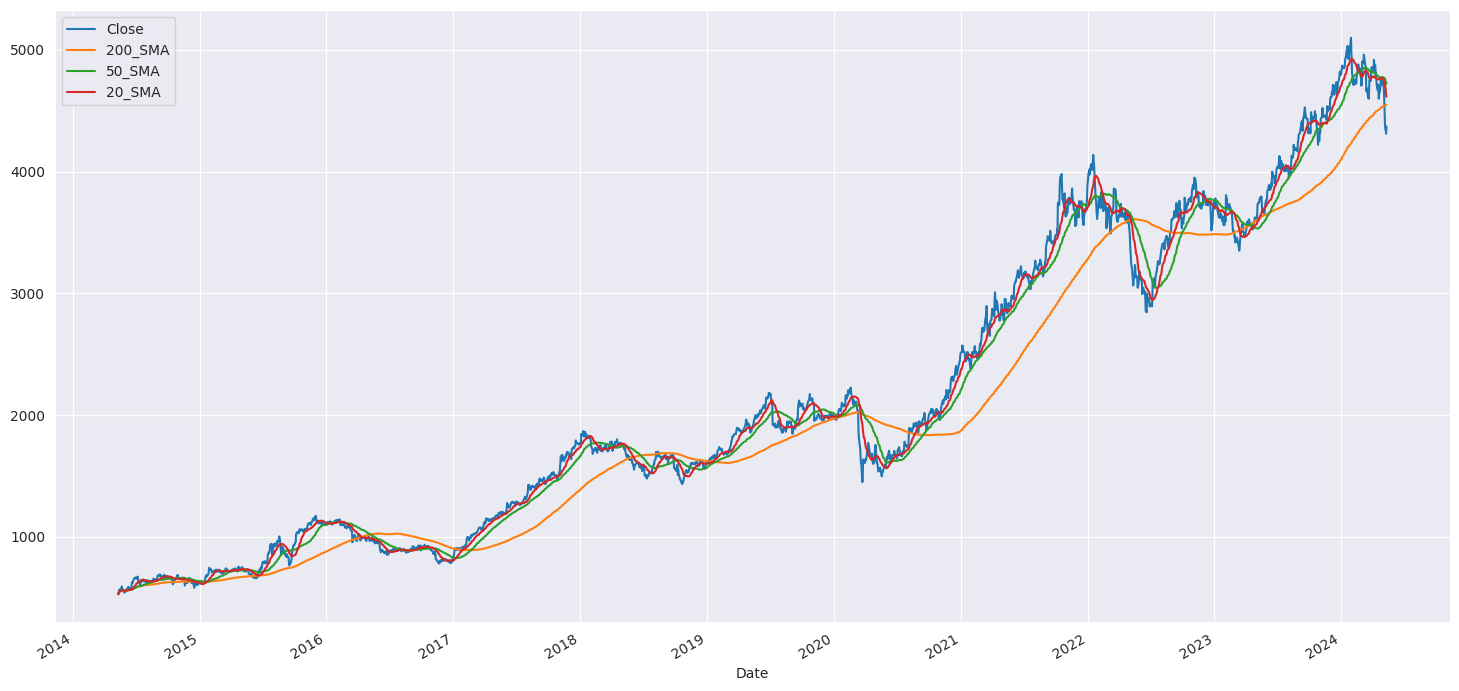

In [9]:
col = ['JEWELLERY']
sector_df = df_sectors[col]
sector_df.columns = ['Close']
sector_df['200_SMA'] = round(sector_df['Close'].rolling(window = 200, min_periods = 1).mean(),0)
sector_df['50_SMA'] = round(sector_df['Close'].rolling(window = 50, min_periods = 1).mean(),0)
sector_df['20_SMA'] = round(sector_df['Close'].rolling(window = 20, min_periods = 1).mean(),0)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
tmp_df = sector_df.reset_index()
tmp_df.plot(x='Date', y=['Close','200_SMA','50_SMA','20_SMA'], figsize=(18,9))

In [10]:
df_sectors = df_sectors[(df_sectors.index <= end_date) & (df_sectors.index >= start1_date)]
for sector in sectors:
  base_value = df_sectors[sector].head(1).values[0]
  df_sectors[sector] = df_sectors[sector]*100/base_value

df_sectors

,AUTO,BANKS,FINANCE,IT,FMCG,PHARMA,MEDIA,METAL,INFRA,CHEMICAL,CEMENT,DURABLES,JEWELLERY,TEXTILES
Date,,,,,,,,,,,,,,
2023-05-11 00:00:00+05:30,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2023-05-12 00:00:00+05:30,100.376427,100.685562,100.655571,100.158956,99.973409,99.331966,99.230013,98.540410,99.191671,99.949808,99.322375,99.882086,100.311494,100.122141
2023-05-15 00:00:00+05:30,100.605117,101.203376,100.705152,100.486499,100.601714,99.567391,100.802180,97.646899,99.772763,99.909312,99.020561,100.979812,100.313970,101.515463
2023-05-16 00:00:00+05:30,99.616430,100.726840,101.577040,100.685899,100.523578,99.372906,99.442927,96.648696,98.762562,99.570294,98.287229,101.007064,100.575698,101.270542
2023-05-17 00:00:00+05:30,100.025003,99.777850,100.455117,99.947358,100.662957,99.006857,96.706340,95.860093,98.262646,99.601986,98.287547,105.553021,99.530819,100.938574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-06 00:00:00+05:30,163.754876,104.470110,119.370089,114.118412,136.535238,147.924796,105.301878,145.965237,136.940492,141.437318,109.134988,210.929061,115.920273,118.883095
2024-05-07 00:00:00+05:30,160.504591,103.917432,119.020426,114.936485,138.977163,145.219927,103.803868,143.237746,135.031910,136.351494,108.237458,208.281121,115.158730,119.150378
2024-05-08 00:00:00+05:30,162.700137,103.618945,118.570612,114.721523,140.291349,143.676373,104.920963,145.100547,134.440987,131.804040,108.542287,208.633291,114.998479,118.938358


<Axes: xlabel='Date'>

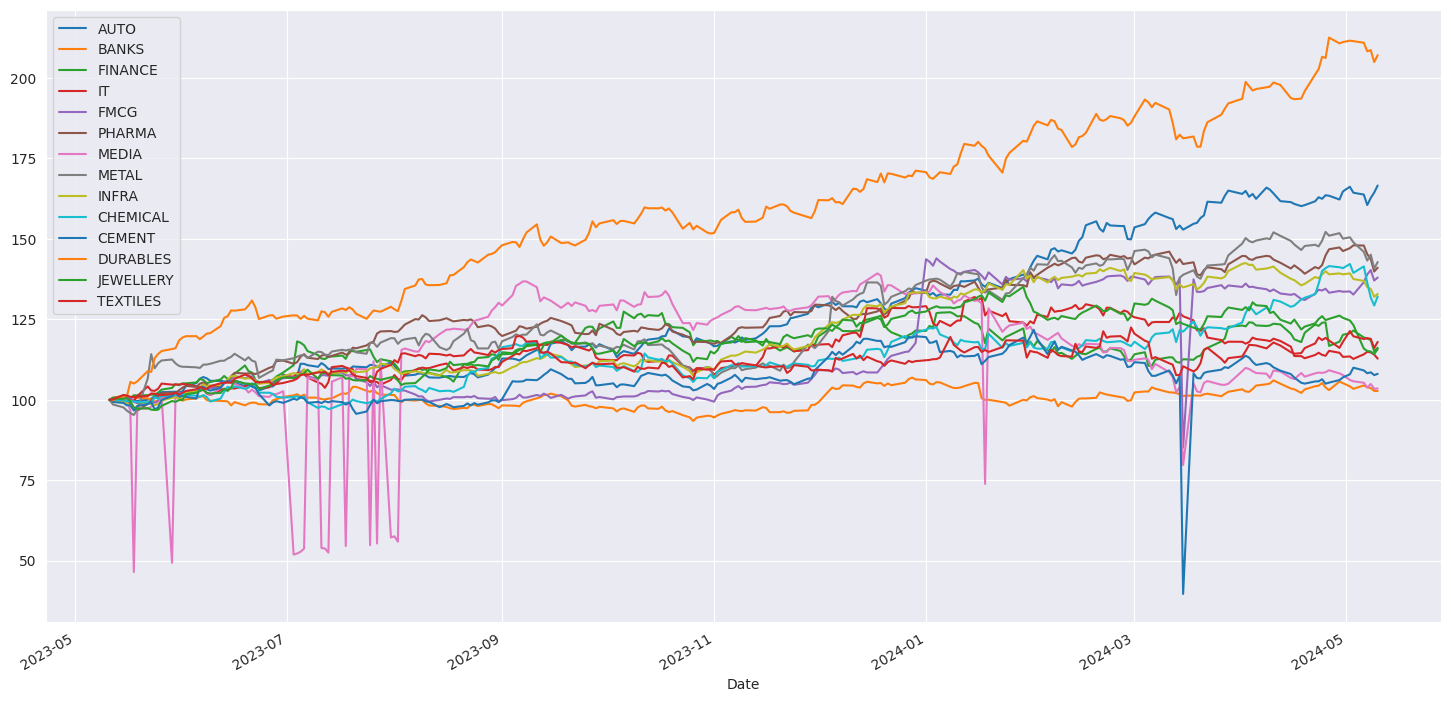

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
tmp_df = df_sectors.reset_index()
tmp_df.plot(x='Date', y=['AUTO', 'BANKS', 'FINANCE', 'IT', 'FMCG', 'PHARMA', 'MEDIA', 'METAL', 'INFRA', 'CHEMICAL', 'CEMENT', 'DURABLES', 'JEWELLERY', 'TEXTILES'], figsize=(18,9))

In [12]:
tmp_df

,Date,AUTO,BANKS,FINANCE,IT,FMCG,PHARMA,MEDIA,METAL,INFRA,CHEMICAL,CEMENT,DURABLES,JEWELLERY,TEXTILES
0,2023-05-11 00:00:00+05:30,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,2023-05-12 00:00:00+05:30,100.376427,100.685562,100.655571,100.158956,99.973409,99.331966,99.230013,98.540410,99.191671,99.949808,99.322375,99.882086,100.311494,100.122141
2,2023-05-15 00:00:00+05:30,100.605117,101.203376,100.705152,100.486499,100.601714,99.567391,100.802180,97.646899,99.772763,99.909312,99.020561,100.979812,100.313970,101.515463
3,2023-05-16 00:00:00+05:30,99.616430,100.726840,101.577040,100.685899,100.523578,99.372906,99.442927,96.648696,98.762562,99.570294,98.287229,101.007064,100.575698,101.270542
4,2023-05-17 00:00:00+05:30,100.025003,99.777850,100.455117,99.947358,100.662957,99.006857,96.706340,95.860093,98.262646,99.601986,98.287547,105.553021,99.530819,100.938574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,2024-05-06 00:00:00+05:30,163.754876,104.470110,119.370089,114.118412,136.535238,147.924796,105.301878,145.965237,136.940492,141.437318,109.134988,210.929061,115.920273,118.883095
242,2024-05-07 00:00:00+05:30,160.504591,103.917432,119.020426,114.936485,138.977163,145.219927,103.803868,143.237746,135.031910,136.351494,108.237458,208.281121,115.158730,119.150378
243,2024-05-08 00:00:00+05:30,162.700137,103.618945,118.570612,114.721523,140.291349,143.676373,104.920963,145.100547,134.440987,131.804040,108.542287,208.633291,114.998479,118.938358
244,2024-05-09 00:00:00+05:30,164.399704,102.759130,115.052420,114.033120,137.058889,139.848812,103.404643,140.783250,131.967542,129.288280,107.669865,204.920426,114.209118,116.084647
